In [7]:
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
import  matplotlib.pyplot as plt

Preprocessing

In [8]:
with open('HomeDatasetTehran_R4_2.txt', 'r', encoding='utf-8') as f:
    lines = f.readlines()
line_item = []
abnormal = [1, 3, 30, 33, 34] 
c = 0
for l in lines:
    new_line = l.split('\t')
    c_item = len(new_line)
    if c_item in abnormal:
        c += 1
        continue
    new_line = new_line[:27]
    line_item.append('\t'.join(new_line))
with open('HomeDatasetTehran.txt', 'w', encoding='utf-8') as f:
    for line in line_item:
        f.write(line+'\n')       

In [9]:
df = pd.read_csv("HomeDatasetTehran.txt", delimiter="\t")
df.head()

,h_type,date,adress,loc,num_floor,unit_per_floor,price,age,statuse,view,...,num_sleep,tel,kitch,service,floor_covering,open,parking,warehouse,balcony,equipment
0,آپارتمان,1402/06/06,تهرانپارس بین رشید و زرین,4,5,2,"8,380,000,000 تومان",12,تخلیه,سنگ,...,2,1,MDF,ايراني فرنگي,پارکت,1,0,1,1,شوفاژ_کولر_آسانسور_گاز
1,آپارتمان,1402/06/08,تهرانپارس خ استخر,4,5,3,"8,700,000,000 تومان",11,مسکونی,سنگ,...,2,1,MDF,ايرانی,سراميک,1,1,1,1,شوفاژ_کولر_آسانسور_گاز
2,آپارتمان,1402/06/13,خواجه عبدالله ك یازدهم,4,4,2,"10,500,000,000 تومان",30,اجاره,آجر,...,2,1,MDF,ايراني فرنگي,سراميک,1,1,1,0,شوفاژ_کولر_گاز
3,آپارتمان,1402/05/28,تهران پارس بلوار پروین خ 218,4,5,3,"5,200,000,000 تومان",11,مسکونی,سنگ,...,2,1,MDF,ايرانی,سراميک,1,0,1,0,شوفاژ_کولر_آسانسور_گاز
4,آپارتمان,1402/06/08,هنگام شمیران نو,4,5,2,"9,100,000,000 تومان",4,مسکونی,سنگ,...,3,1,MDF,ايرانی,سراميک,1,1,0,0,شوفاژ_کولر_آسانسور_گاز


In [10]:
for idx, value in enumerate(df['price']):
    if isinstance(value, str):
        num_part = ''.join(filter(str.isdigit, value))
        df.at[idx, 'price']= int(num_part)
df['M2'] = df.price/df.area 
df.head()

,h_type,date,adress,loc,num_floor,unit_per_floor,price,age,statuse,view,...,tel,kitch,service,floor_covering,open,parking,warehouse,balcony,equipment,M2
0,آپارتمان,1402/06/06,تهرانپارس بین رشید و زرین,4,5,2,8380000000,12,تخلیه,سنگ,...,1,MDF,ايراني فرنگي,پارکت,1,0,1,1,شوفاژ_کولر_آسانسور_گاز,92087912.087912
1,آپارتمان,1402/06/08,تهرانپارس خ استخر,4,5,3,8700000000,11,مسکونی,سنگ,...,1,MDF,ايرانی,سراميک,1,1,1,1,شوفاژ_کولر_آسانسور_گاز,72500000.0
2,آپارتمان,1402/06/13,خواجه عبدالله ك یازدهم,4,4,2,10500000000,30,اجاره,آجر,...,1,MDF,ايراني فرنگي,سراميک,1,1,1,0,شوفاژ_کولر_گاز,105000000.0
3,آپارتمان,1402/05/28,تهران پارس بلوار پروین خ 218,4,5,3,5200000000,11,مسکونی,سنگ,...,1,MDF,ايرانی,سراميک,1,0,1,0,شوفاژ_کولر_آسانسور_گاز,68421052.631579
4,آپارتمان,1402/06/08,هنگام شمیران نو,4,5,2,9100000000,4,مسکونی,سنگ,...,1,MDF,ايرانی,سراميک,1,1,0,0,شوفاژ_کولر_آسانسور_گاز,65000000.0


In [11]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['age'] = pd.to_numeric(df['age'], errors='coerce')

In [12]:
address = df['adress'].value_counts()
address[address == 1]

adress
هروی خ ساقدوش خ شقاقی                   1
هنگام نرسیده به ك 12 مركزی              1
بزرگراه رسالت خ حسینی                   1
هنگام شمیران نو خ غفاری                 1
تهرانپارس خ 194 شرقی                    1
                                       ..
مجیدیه شمالی میدان ملت                  1
شهید عراقی نرسیده به خ كشوری            1
تهرانپارس بلوار پروین بین بلوار و131    1
تهرانپارس خ 162 شرقی                    1
شمس اباد خ هدایتی                       1
Name: count, Length: 455, dtype: int64

In [13]:
main_address = ['استخر','پروین','خواجه عبدلله','شمیران نو','بنی هاشم','نیروی دریایی','میدان شاهد'
,'فرجام','مجیدیه','تهران پارس','جشنواره','هروی','حکیمیه','شمس اباد','اتوبان بابایی','شمس آباد'                
,'دلاوران','دماوند','سراج','رسالت','لویزان','خواجه عبدالله'               
,'تهرانپارس','شهید عراقی','شهیدعراقی','شمس أباد','هنگام','تهارنپارس'
,'قنات کوثر','نیروی دریائی','ایت','خواجه عبداله','شریعتی']
def replace_address(s):
    for each_address in main_address:
        if each_address in s:
            s = each_address
    return s
df['adress'] = df['adress'].apply(replace_address)
df['adress'].unique()        

array(['تهرانپارس', 'استخر', 'خواجه عبدالله', 'پروین', 'شمیران نو',
       'مجیدیه', 'بنی هاشم', 'نیروی دریایی', 'میدان شاهد', 'شریعتی',
       'هروی', 'فرجام', 'تهران پارس', 'جشنواره', 'حكیمیه خ لریجانی',
       'سراج', 'شمس اباد', 'حكیمیه سازمان آب', 'نیروی دریائی', 'رسالت',
       'اتوبان بابایی', 'حكیمیه خ پیام', 'شمس آباد', 'خواجه عبداله',
       'حكیمیه خ سازمان آب', 'دلاوران', 'حكیمیه فاز 2', 'دماوند', 'هنگام',
       'حكیمیه خ والفجر', 'لویزان', 'حكیمیه پیام', 'حكیمیه بلوار ساحل',
       'قنات كوثر بلوار مطهری', 'شهید عراقی', 'حكیمیه سحر',
       'حكیمیه بلواربابائیان خ امام حسین', 'حكیمیه شهرك والفجر',
       'حكیمیه تقاطع سازمان آب و بهار', 'حكیمیه فاز یك خ گلریز',
       'حكیمیه نگارستان', 'حكیمیه فاز یك', 'حكیمیه خ بهار سازمان آب',
       'حكیمیه كوچه گلریز', 'قنات كوثر كوی سوم', 'حكیمیه گلریز',
       'بزرگراه بابایی شهرك كوثر', 'حكیمیه 15 متری شیرازی',
       'حكیمیه بلوار فجر', 'شهیدعراقی', 'حكیمیه نرسیده به نگارستان',
       'حكیمیه فاز 3 خ بهشت', 'شمس آّباد بلوار بیژن'

In [14]:
correct_address = {address:address for address in df['adress']}
correct_address

{'تهرانپارس': 'تهرانپارس',
 'استخر': 'استخر',
 'خواجه عبدالله': 'خواجه عبدالله',
 'پروین': 'پروین',
 'شمیران نو': 'شمیران نو',
 'مجیدیه': 'مجیدیه',
 'بنی هاشم': 'بنی هاشم',
 'نیروی دریایی': 'نیروی دریایی',
 'میدان شاهد': 'میدان شاهد',
 'شریعتی': 'شریعتی',
 'هروی': 'هروی',
 'فرجام': 'فرجام',
 'تهران پارس': 'تهران پارس',
 'جشنواره': 'جشنواره',
 'حكیمیه خ لریجانی': 'حكیمیه خ لریجانی',
 'سراج': 'سراج',
 'شمس اباد': 'شمس اباد',
 'حكیمیه سازمان آب': 'حكیمیه سازمان آب',
 'نیروی دریائی': 'نیروی دریائی',
 'رسالت': 'رسالت',
 'اتوبان بابایی': 'اتوبان بابایی',
 'حكیمیه خ پیام': 'حكیمیه خ پیام',
 'شمس آباد': 'شمس آباد',
 'خواجه عبداله': 'خواجه عبداله',
 'حكیمیه خ سازمان آب': 'حكیمیه خ سازمان آب',
 'دلاوران': 'دلاوران',
 'حكیمیه فاز 2': 'حكیمیه فاز 2',
 'دماوند': 'دماوند',
 'هنگام': 'هنگام',
 'حكیمیه خ والفجر': 'حكیمیه خ والفجر',
 'لویزان': 'لویزان',
 'حكیمیه پیام': 'حكیمیه پیام',
 'حكیمیه بلوار ساحل': 'حكیمیه بلوار ساحل',
 'قنات كوثر بلوار مطهری': 'قنات كوثر بلوار مطهری',
 'شهید عراقی': 'شهید عراقی

In [15]:
correct_address['تهارنپارس'] = 'تهرانپارس'
correct_address['شمس آباد'] = 'شمس أباد'
correct_address['شمس اباد'] = 'شمس أباد'
correct_address['شمس أباد'] = 'شمس أباد'
correct_address['خواجه عبداله'] = 'خواجه عبدالله'
correct_address['نیروی دریائی'] = 'نیروی دریایی'
correct_address['تهران پارس'] = 'تهرانپارس'
correct_address['بزرگراه بابایی شهرك كوثر'] = 'اتوبان بابایی'
df['adress'] = df['adress'].map(correct_address)
df['adress'].unique()

array(['تهرانپارس', 'استخر', 'خواجه عبدالله', 'پروین', 'شمیران نو',
       'مجیدیه', 'بنی هاشم', 'نیروی دریایی', 'میدان شاهد', 'شریعتی',
       'هروی', 'فرجام', 'جشنواره', 'حكیمیه خ لریجانی', 'سراج',
       'شمس أباد', 'حكیمیه سازمان آب', 'رسالت', 'اتوبان بابایی',
       'حكیمیه خ پیام', 'حكیمیه خ سازمان آب', 'دلاوران', 'حكیمیه فاز 2',
       'دماوند', 'هنگام', 'حكیمیه خ والفجر', 'لویزان', 'حكیمیه پیام',
       'حكیمیه بلوار ساحل', 'قنات كوثر بلوار مطهری', 'شهید عراقی',
       'حكیمیه سحر', 'حكیمیه بلواربابائیان خ امام حسین',
       'حكیمیه شهرك والفجر', 'حكیمیه تقاطع سازمان آب و بهار',
       'حكیمیه فاز یك خ گلریز', 'حكیمیه نگارستان', 'حكیمیه فاز یك',
       'حكیمیه خ بهار سازمان آب', 'حكیمیه كوچه گلریز',
       'قنات كوثر كوی سوم', 'حكیمیه گلریز', 'حكیمیه 15 متری شیرازی',
       'حكیمیه بلوار فجر', 'شهیدعراقی', 'حكیمیه نرسیده به نگارستان',
       'حكیمیه فاز 3 خ بهشت', 'شمس آّباد بلوار بیژن', 'حكیمیه نهالستان',
       'حكیمیه فاز 1', 'قنات كوثر كوچه ششم', 'قنات كوثر بلواراستقلال',


In [16]:
df.floor.unique()
replace_floor = {floor:floor for floor in df.floor}
df.floor = df.floor.fillna(0)
df.floor.unique()

array(['5', '2', '4', 'همكف', '3', '1', 'مختلف', '7', 'زیرهمكف', '11',
       '6', '13', '8', '1و2و4و5', '1و2', '9', '14', '1و3', '10', '3و4',
       '12', '18'], dtype=object)

In [17]:
replace_floor = {'5': '5',
 '2': '2',
 '4': '4',
 'همكف': '0',
 '3': '3',
 '1': '1',
 'مختلف': '2',
 '7': '7',
 'زیرهمكف': '-1',
 '11': '11',
 '6': '6',
 '13': '13',
 '8': '8',
 '1و2و4و5': '15',
 '1و2': '12',
 '9': '9',
 '14': '14',
 '1و3': '13',
 '10': '10',
 '3و4': '34',
 '12': '12',
 '18': '18'}
df['floor'] = df['floor'].map(replace_floor)
df['floor'] = df['floor'].astype(int)
df.floor.unique()

array([ 5,  2,  4,  0,  3,  1,  7, -1, 11,  6, 13,  8, 15, 12,  9, 14, 10,
       34, 18])

In [18]:
df_equipment = df["equipment"].str.get_dummies(sep='_')
df_equipmentColumnsName = ['elevator', 'pool', 'jacuzzi', 'yard', 'private yard', 'underground',
      'Heating', 'fan cooler', 'user', 'patio', 'package', 'chiller', 'cooler', 'gas']
df_equipment = df_equipment.rename(columns=dict(zip(df_equipment.columns, df_equipmentColumnsName)))
df = pd.concat([df, df_equipment], axis=1)
df.head()

,h_type,date,adress,loc,num_floor,unit_per_floor,price,age,statuse,view,...,underground,Heating,fan cooler,user,patio,package,chiller,cooler,gas,گاز
0,آپارتمان,1402/06/06,تهرانپارس,4,5,2,8380000000,12.0,تخلیه,سنگ,...,0,0,1,0,0,0,0,0,1,1
1,آپارتمان,1402/06/08,استخر,4,5,3,8700000000,11.0,مسکونی,سنگ,...,0,0,1,0,0,0,0,0,1,1
2,آپارتمان,1402/06/13,خواجه عبدالله,4,4,2,10500000000,30.0,اجاره,آجر,...,0,0,1,0,0,0,0,0,1,1
3,آپارتمان,1402/05/28,پروین,4,5,3,5200000000,11.0,مسکونی,سنگ,...,0,0,1,0,0,0,0,0,1,1
4,آپارتمان,1402/06/08,شمیران نو,4,5,2,9100000000,4.0,مسکونی,سنگ,...,0,0,1,0,0,0,0,0,1,1


In [19]:
dict(df.doc_status.value_counts())

{'شخصي': 829,
 'قولنامه اي': 67,
 'تعاوني': 41,
 'دردست اقدام': 16,
 'مشاع': 5,
 'اوقافي': 4,
 'وکالتي': 1}

In [20]:
replace_dict1 = {'نوساز':0}
df['age'] = df['age'].replace(replace_dict1)
df.age.unique()

array([12., 11., 30.,  4., nan,  8., 17., 20.,  5.,  6., 16.,  2.,  9.,
        7., 18.,  3.,  1., 22., 13., 10., 15., 25., 19., 21., 26., 23.,
       14., 24., 27., 29., 28.])

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 963 entries, 0 to 962
Data columns (total 43 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   h_type          963 non-null    object 
 1   date            963 non-null    object 
 2   adress          963 non-null    object 
 3   loc             963 non-null    int64  
 4   num_floor       963 non-null    int64  
 5   unit_per_floor  963 non-null    object 
 6   price           963 non-null    int64  
 7   age             830 non-null    float64
 8   statuse         963 non-null    object 
 9   view            963 non-null    object 
 10  doc_status      963 non-null    object 
 11  north           963 non-null    int64  
 12  sought          963 non-null    int64  
 13  west            963 non-null    int64  
 14  east            963 non-null    int64  
 15  floor           963 non-null    int32  
 16  area            963 non-null    int64  
 17  num_sleep       963 non-null    int

In [22]:
df.drop(['گاز'], axis=1,inplace=True)

Working With Outliers

{'whiskers': [<matplotlib.lines.Line2D at 0x2568d68b700>,
 'caps': [<matplotlib.lines.Line2D at 0x2568d68bc40>,
 'boxes': [<matplotlib.lines.Line2D at 0x2568d68b460>],
 'medians': [<matplotlib.lines.Line2D at 0x2568d6cc1c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2568d6cc460>],
 'means': []}

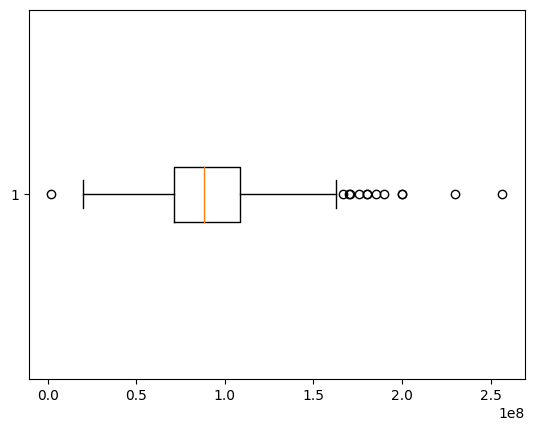

In [23]:
plt.boxplot(df.M2, vert=False)

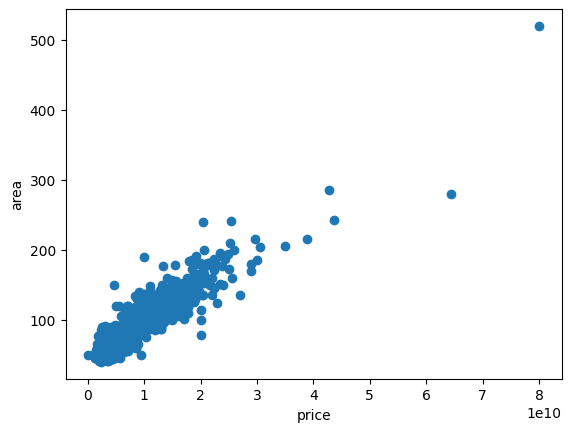

In [24]:
plt.scatter(df.price, df.area)
plt.xlabel('price')
plt.ylabel('area')
plt.show()

In [25]:
def lower_upper(x):
    Q1 = np.percentile(x, 25)
    Q3 = np.percentile(x, 75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5*IQR
    upper = Q3 + 1.5*IQR
    return lower, upper
lower_area , upper_area = lower_upper(df['area'])
lower_price, upper_price = lower_upper(df['price'])
print(f"Lower limit for area:{lower_area:0.2f}")
print(f"Upper limit for area:{upper_area:0.2f}")
print(f"Lower limit for price:{lower_price:,}")
print(f"Upper limit for area:{upper_price:,}")

Lower limit for area:-2.50
Upper limit for area:177.50
Lower limit for price:-5,825,000,000.0
Upper limit for area:21,975,000,000.0


In [26]:
area_outliers = np.where(df['area'] > upper_area)
price_outliers = np.where(df['price'] > upper_price)
total_outliers = np.union1d(area_outliers, price_outliers)
print(f"Number of area outliers: {len(df.iloc[area_outliers])}")
print(f"Number of price outliers: {len(df.iloc[price_outliers])}")
print(f"Number of outliers: {len(df.iloc[total_outliers])}")

Number of area outliers: 35
Number of price outliers: 33
Number of outliers: 48


In [27]:


Q1 = df.M2.quantile(0.25)
Q3 = df.M2.quantile(0.75)
IQR = Q3 - Q1
upper_cap = Q3 + 1.5*IQR
lower_cap = Q1 - 1.5*IQR
BM = (lower_cap <= df.M2) & (df.M2 <= upper_cap)
df = df[BM]
df.M2.describe()

count           950.0
unique          563.0
top       100000000.0
freq             43.0
Name: M2, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x2568d7f6e90>,
 'caps': [<matplotlib.lines.Line2D at 0x2568d7f73d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2568d7f6bf0>],
 'medians': [<matplotlib.lines.Line2D at 0x2568d7f7910>],
 'fliers': [<matplotlib.lines.Line2D at 0x2568d7f7bb0>],
 'means': []}

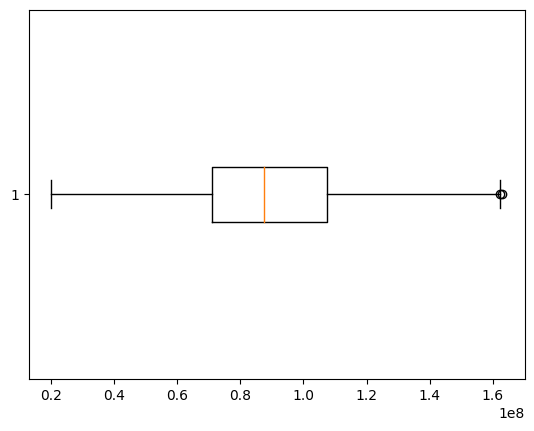

In [28]:
bm_upper = df.M2 > upper_cap
df.M2[bm_upper] = upper_cap
plt.boxplot(df.M2, vert=False)

{'whiskers': [<matplotlib.lines.Line2D at 0x2568f8b65f0>,
 'caps': [<matplotlib.lines.Line2D at 0x2568f8b6b30>,
 'boxes': [<matplotlib.lines.Line2D at 0x2568f8b6350>],
 'medians': [<matplotlib.lines.Line2D at 0x2568f8b7070>],
 'fliers': [<matplotlib.lines.Line2D at 0x2568f8b7310>],
 'means': []}

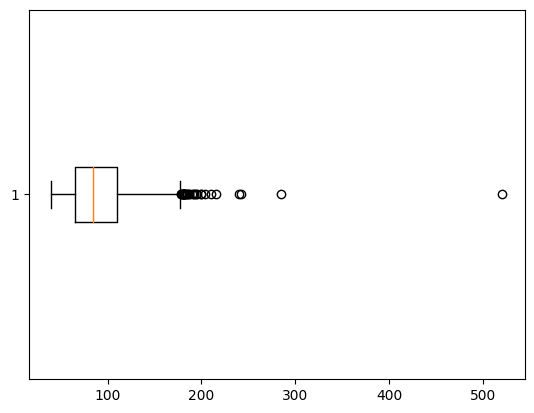

In [29]:
plt.boxplot(df.area, vert=False)

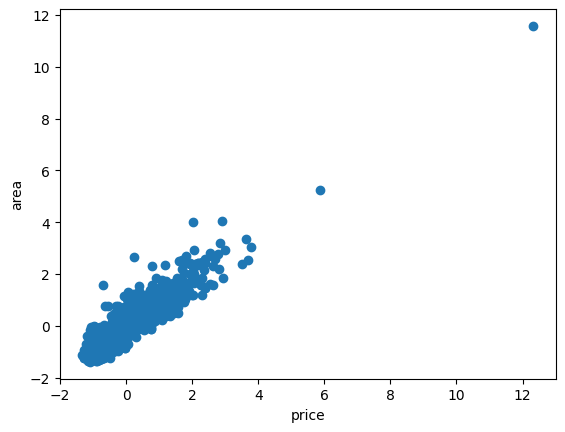

In [30]:
from sklearn.cluster import DBSCAN
features = ['price', 'area']
scale = StandardScaler()
df[features] = scale.fit_transform(df[features])
dbscan = DBSCAN(eps=0.5, min_samples=5)
df['Cluster'] = dbscan.fit_predict(df[features])
outliers = df[df['Cluster'] == -1]
df.drop(columns=['Cluster'], inplace=True)
plt.scatter(df.price, df.area)
plt.xlabel('price')
plt.ylabel('area')
plt.show()

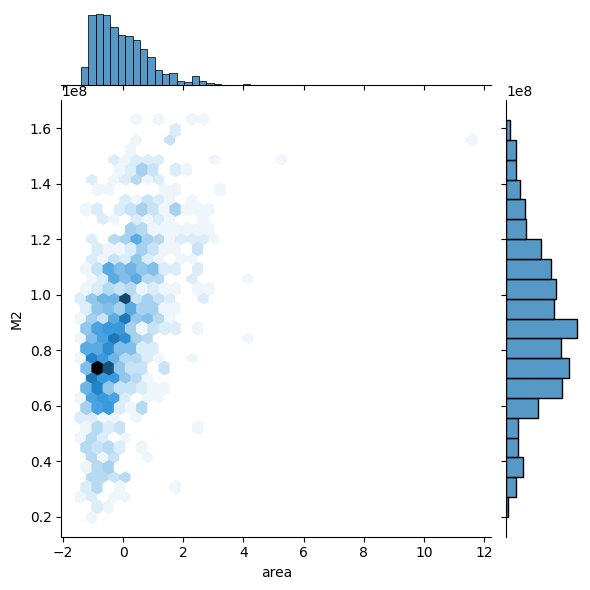

In [40]:
sns.jointplot(x='area',y='M2',kind='hex',data=df)

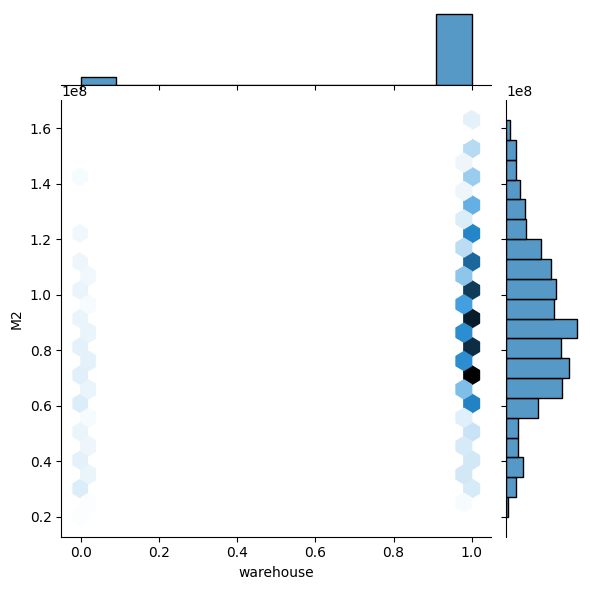

In [41]:
sns.jointplot(x='warehouse',y='M2',kind='hex',data=df)

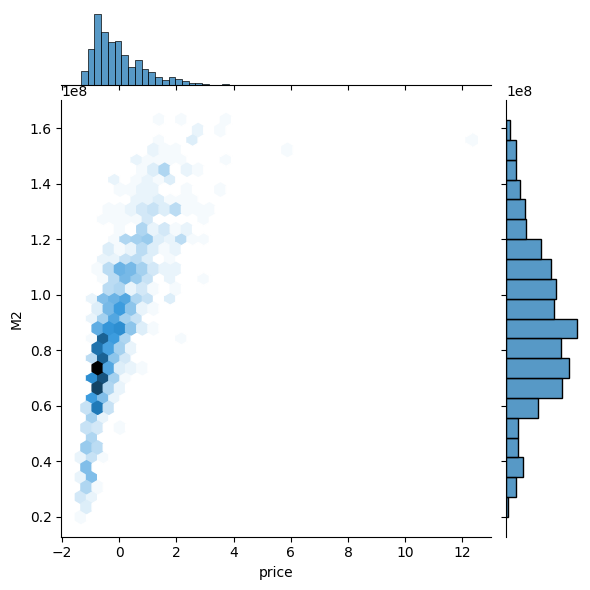

In [42]:
sns.jointplot(x='price',y='M2',kind='hex',data=df)

In [31]:
x = df[['balcony','warehouse','parking','num_sleep','price','age','num_floor','loc','area','price','north','west', 'east']]
y = df.loc[:,['M2']].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [32]:
sc = StandardScaler()
x_train_scale = sc.fit_transform(x_train)
x_test_scale = sc.fit_transform(x_test)

Prediction

In [ ]:
y_pred = sgd_reg.predict(x_test_scale)
print('score train =', sgd_reg.score(x_train_scale, y_train))
print('score test =', sgd_reg.score(x_test_scale, y_test))
mse = mean_squared_error(y_test, y_pred)
print('MSE =', mse)

score train = 0.8456520821145397
score test = 0.8260069791453787
MSE = 113149211201977.02


In [ ]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(x_train_scale, y_train)
print('score train =', LR.score(x_train_scale, y_train))
print('score test =', LR.score(x_test_scale, y_test))
y_pred = LR.predict(x_test_scale)
mse = mean_squared_error(y_test, y_pred)
print('MSE =', mse)

score train = 0.8573195887240823
score test = 0.8529370916744488
MSE = 95636319160228.02


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rmr = RandomForestRegressor(n_estimators=400, max_features=0.8, random_state=42, min_samples_split=50, max_samples=0.7)
rmr.fit(x_train_scale, y_train)
print('score train =', rmr.score(x_train_scale, y_train))
print('score test =', rmr.score(x_test_scale, y_test))
y_pred = rmr.predict(x_test_scale)
mse = mean_squared_error(y_test, y_pred)
print('MSE =', mse)

f:\2014\machine learning\env\lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


score train = 0.8894631408367268
score test = 0.7491612266097003
MSE = 163122688534147.72


In [ ]:
from sklearn.linear_model import RANSACRegressor
RR = RANSACRegressor()
RR.fit(x_train_scale, y_train)
print('score train =', RR.score(x_train_scale, y_train))
print('score test =', RR.score(x_test_scale, y_test))
y_pred = RR.predict(x_test_scale)
mse = mean_squared_error(y_test, y_pred)
print('MSE =', mse)

score train = 0.8079124736340183
score test = 0.8125388002886885
MSE = 121907687872342.56
